# Supervised learning

## Dependencies

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from math import sqrt, ceil

## Data processing

In [2]:
data = pd.read_csv('2016-2017_orig.csv', sep=';')[:10000]
print(len(data))
data.head()



10000


,date,name_1,name_2,age_1,age_2,rating_1,rating_2,k1,k2,result,player1_is_win?
0,01.01.2016,Samantha Crawford,Tsvetana Pironkova,20,28,142,59,4.05,1.27,7-6(1) 6-4,1
1,01.01.2016,Tsvetana Pironkova,Samantha Crawford,28,20,59,142,1.27,4.05,7-6(1) 6-4,0
2,01.01.2016,Kimberly Birrell,Xinyun Han,17,25,366,157,3.74,1.30,6-7(4) 6-1 6-4,1
3,01.01.2016,Xinyun Han,Kimberly Birrell,25,17,157,366,1.30,3.74,6-7(4) 6-1 6-4,0
4,01.01.2016,Olga Savchuk,Sesil Karatantcheva,28,26,196,112,2.39,1.62,6-1 6-2,1


In [3]:
x = data.drop(['player1_is_win?', 'name_1', 'name_2', 'result'], axis=1)
y = data['player1_is_win?']

for col in ['date']:
    le = LabelEncoder()
    le.fit(data[col])
    transformed = le.transform(data[col])
    x[col] = transformed



x = StandardScaler().fit_transform(x)
win = data[data['player1_is_win?'] == 1]
lose = data[data['player1_is_win?'] == 0]
print(f"win: {len(win)}, lose:{len(lose)}")

win: 5000, lose:5000


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(f"Size of train: {len(y_train)}\nSize of test: {len(y_test)}")
    


Size of train: 9000
Size of test: 1000


## Find best K

In [37]:
dc = DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train, y_train)

preds_test = dc.predict(x_test)
accuracy_test = accuracy_score(preds_test, y_test)

preds_train = dc.predict(x_train)
accuracy_train = accuracy_score(preds_train, y_train)

print(f"accuracy train: {accuracy_train}, accuracy test: {accuracy_test}")



accuracy train: 0.9954444444444445, accuracy test: 0.587


In [28]:
params = {
    'max_depth': [*range(1, 50),None],
    'min_samples_split': [3,5,10,20],
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': [1,3,5,20,40]
}
gscv = GridSearchCV(estimator=dc, param_grid=params, cv=5, scoring='accuracy')
gscv.fit(x_train, y_train)

gscv.best_estimator_

# # 


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=40,
                       min_samples_split=3)

In [36]:
gscv.best_score_

0.6726666666666666

In [68]:
dc = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=40, min_samples_split=3)

dc.fit(x_train, y_train)

preds_test = dc.predict(x_test)
accuracy_test = accuracy_score(preds_test, y_test)

preds_train = dc.predict(x_train)
accuracy_train = accuracy_score(preds_train, y_train)

print(f"accuracy train: {accuracy_train}, accuracy test: {accuracy_test}")



accuracy train: 0.691, accuracy test: 0.657


In [89]:

dc = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dc.fit(x_train, y_train)

preds_test = dc.predict(x_test)
accuracy_test = accuracy_score(preds_test, y_test)

preds_train = dc.predict(x_train)
accuracy_train = accuracy_score(preds_train, y_train)

print(f"accuracy train: {accuracy_train}, accuracy test: {accuracy_test}")



accuracy train: 0.695, accuracy test: 0.66


In [90]:

dc = RandomForestClassifier(criterion='entropy')
dc.fit(x_train, y_train)

preds_test = dc.predict(x_test)
accuracy_test = accuracy_score(preds_test, y_test)

preds_train = dc.predict(x_train)
accuracy_train = accuracy_score(preds_train, y_train)

print(f"accuracy train: {accuracy_train}, accuracy test: {accuracy_test}")



accuracy train: 0.9954444444444445, accuracy test: 0.65


In [94]:
dc = RandomForestClassifier(n_jobs=-1)
params = {
    'n_estimators': [10, 25, 50],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf': [2,5,10,20,40],
    'max_depth': range(1,40),
    'criterion': ['entropy'],

}
gs = GridSearchCV(dc, param_grid=params, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# dc.fit(x_train, y_train)

# preds_test = dc.predict(x_test)
# accuracy_test = accuracy_score(preds_test, y_test)

# preds_train = dc.predict(x_train)
# accuracy_train = accuracy_score(preds_train, y_train)

# print(f"accuracy train: {accuracy_train}, accuracy test: {accuracy_test}")



{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [100]:
gs
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
184,0.027450,0.001593,0.005098,0.000241,entropy,4,2,5,25,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.692778,0.686111,0.673889,0.673333,0.677222,0.680667,0.007588,1
147,0.013364,0.001206,0.004076,0.000650,entropy,3,10,5,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.690000,0.681111,0.659444,0.682778,0.688333,0.680333,0.010958,2
408,0.016230,0.002319,0.003778,0.000271,entropy,7,40,2,10,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.692222,0.686667,0.664444,0.680556,0.677778,0.680333,0.009386,3
297,0.013837,0.000507,0.003534,0.000172,entropy,5,40,20,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.683333,0.695556,0.666111,0.683333,0.671111,0.679889,0.010354,4
775,0.038181,0.004627,0.005857,0.000347,entropy,13,40,10,25,"{'criterion': 'entropy', 'max_depth': 13, 'min...",0.680556,0.692222,0.668333,0.680556,0.677222,0.679778,0.007663,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.009973,0.000280,0.003396,0.000118,entropy,1,5,10,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.588889,0.651111,0.642222,0.641111,0.661667,0.637000,0.025165,2336
6,0.010241,0.000174,0.003390,0.000222,entropy,1,2,10,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.627222,0.656667,0.660556,0.575556,0.660000,0.636000,0.032670,2337
48,0.011066,0.001697,0.003738,0.000652,entropy,1,40,2,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.584444,0.659444,0.632222,0.644444,0.647778,0.633667,0.026095,2338
0,0.163815,0.301084,0.005937,0.004744,entropy,1,2,2,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.664444,0.601111,0.590000,0.642222,0.587222,0.617000,0.030839,2339


In [39]:
rf = RandomForestClassifier(n_jobs=-1, criterion='entropy', min_samples_split=5, n_estimators=50, max_depth=5)
rf.fit(x_train, y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print(f'Accuracy train: {acc_train}\nAccuracy test: {acc_test}')

Accuracy train: 0.6888888888888889
Accuracy test: 0.682


# MLP


In [193]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.01, max_iter=10000, learning_rate_init=0.01)

mlp.fit(x_train, y_train)


pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print(f'Accuracy train: {acc_train}\nAccuracy test: {acc_test}')

Accuracy train: 0.6866666666666666
Accuracy test: 0.664


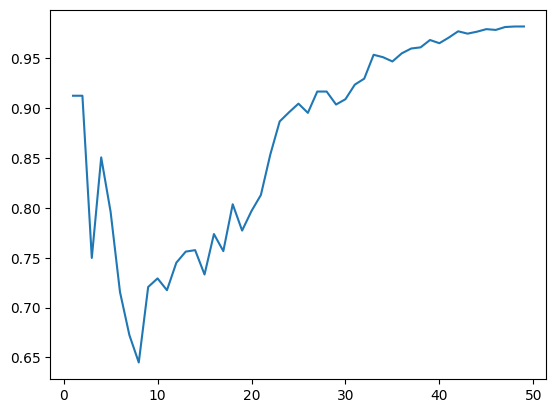

0.912510118936422

In [98]:
recalls = {}
accuracies = {}
for m_depth in range(50):
    dc = DecisionTreeClassifier(criterion='entropy', max_depth=m_depth)
    dc.fit(x_train, y_train)
    preds = dc.predict(x_train)
    recalls[m_depth] = recall_score(y_train, preds)
    accuracies[m_depth] = accuracy_score(y_train, preds)


plt.figure()
plt.plot(list(recalls.keys()), list(recalls.values()))
plt.show()


recalls[1]

In [77]:
plt.figure()
plt.title = 'Test accuracy'
plt.plot(list(accuracy_test.keys()), list(accuracy_test.values()))

NameError: name 'accuracy_test' is not defined

<Figure size 640x480 with 0 Axes>